In [122]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## K-Means 

In [123]:
def K_Mean (dataset, k, centroids, label):
    ##get new list of labels of the pixels
    for n in range (0, dataset.shape[0], 1):
        minDis = np.inf
        minIndex = -1
        for j in range (0, k, 1):
            sum_d = np.power((dataset[n][0] - centroids[j][0]), 2) + np.power((dataset[n][1] - centroids[j][1]), 2) + np.power((dataset[n][2] - centroids[j][2]), 2)
            distance = np.sqrt(sum_d)
            if distance < minDis:
                minDis = distance 
                minIndex = j
        label[n] = minIndex
    
    ## renew centroids (center of each cluster)
    for x in range (0, k, 1):
        sumX = 0
        sumY = 0
        sumZ = 0
        num = 0
        for y in range (0, dataset.shape[0], 1):
            if label[y] == x :
                sumX = sumX + dataset[y][0]
                sumY = sumY + dataset[y][1]
                sumZ = sumZ + dataset[y][2]
                num = num + 1
        centroids[x] = [sumX/num, sumY/num, sumZ/num] 
    print(centroids)
        
    return centroids, label


## K=2

[[49.52143881671974, 103.27298251324984, 149.06003885944477], [133.6896495600427, 144.47483851279182, 133.41863587813438]]
[[37.18208463088478, 96.74513036575685, 149.68072819895497], [167.7213336749259, 161.81578401590846, 129.43331015383865]]
[[40.53196654308857, 97.25095986326593, 146.96930088926686], [173.5380213783329, 166.58253970356438, 132.0472204193544]]
[[42.03389036515334, 97.48668535105928, 145.71387033462292], [175.9167136008352, 168.7530942209157, 133.62896822671263]]
[[42.64106260461466, 97.60389386767898, 145.2487686504409], [176.82313750087113, 169.5940901805004, 134.26121680953378]]
[[42.87580530563694, 97.65186048553842, 145.0716811827914], [177.16329105052912, 169.91349078421754, 134.51053332398908]]
[[42.97990306277004, 97.67862438417755, 145.00485483330942], [177.31756737768035, 170.04807070792234, 134.6017620773965]]
[[43.015816228964816, 97.68851988781235, 144.98292484701682], [177.37131525652566, 170.09370780828084, 134.63139907740774]]
[[43.02989795024178, 97.

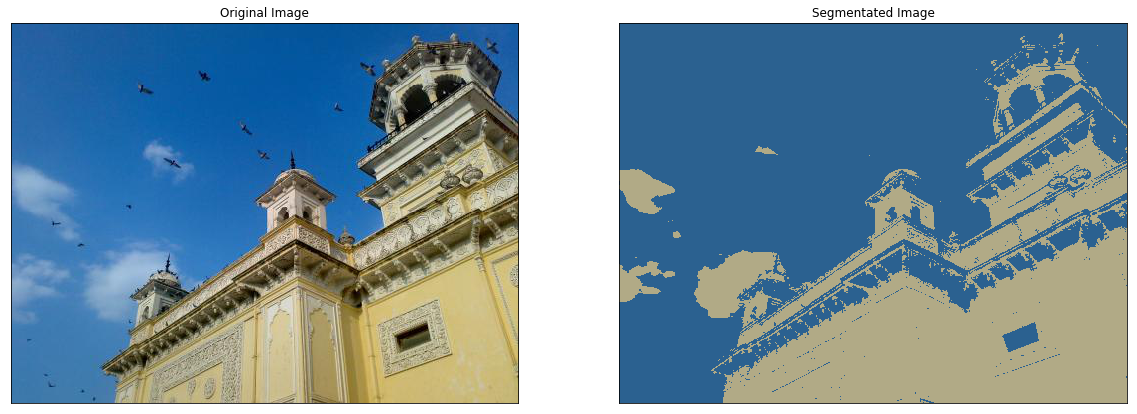

In [127]:
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)
dataset = img.reshape(img.shape[0]*img.shape[1], 3)

k = 2
firstHalf = int(dataset.shape[0]/k) - 1
# initialize the label 
label = []
for i in range (0, firstHalf, 1):
    label.append(0)
for j in range (firstHalf, dataset.shape[0], 1):
    label.append(1)
# initialize the center
centroids = []
for x in range (0, k, 1):
    sumX_i = 0
    sumY_i = 0
    sumZ_i = 0
    num_i = 0
    for y in range (0, dataset.shape[0], 1):
        if label[y] == x :
            sumX_i = sumX_i + dataset[y][0]
            sumY_i = sumY_i + dataset[y][1]
            sumZ_i = sumZ_i + dataset[y][2]
            num_i = num_i + 1
    centroids.append([sumX_i/num_i, sumY_i/num_i, sumZ_i/num_i])  

print(centroids)
# K_means iteration(10)
for n in range(10):
    centroids, label = K_Mean(dataset, k, centroids, label)

    
centroids = np.uint8(centroids)
segmentation = centroids[label]
segmentation = segmentation.reshape((img.shape))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(segmentation)
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

## K = 3

196608
[[33.91331481933594, 94.10685729980469, 147.1336669921875], [91.37059020996094, 124.70164489746094, 147.33444213867188], [149.5340118408203, 152.81385803222656, 129.24966430664062]]
[[27.786803554942548, 91.10535799695226, 147.74710521339665], [83.92379633741739, 118.13819587763525, 144.51098513545287], [179.7537631894309, 170.1368777949902, 130.85850407739747]]
[[25.122735270340957, 91.17700556374531, 150.90319320937752], [86.99533092563402, 114.88850090787557, 132.74858830337013], [184.9667014028056, 175.18767134268538, 135.02900200400802]]
[[24.7299404711998, 95.30650744409444, 160.32158727497037], [89.63055795279728, 108.30923792728228, 114.44694382949983], [186.70780881689151, 177.61671431198488, 138.47949579550965]]
[[31.614846618000758, 103.57874804844086, 170.16454280771342], [92.38268585131894, 91.89755395683453, 75.3578896882494], [185.67254458344425, 178.06201756720787, 141.32662363587968]]
[[34.79410280222886, 105.63734555438909, 171.36676290075104], [89.233208955223

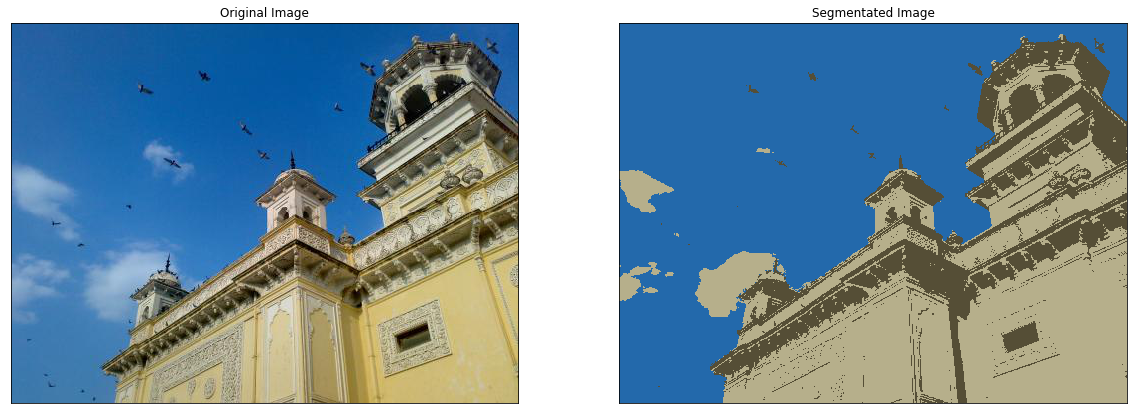

In [129]:
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)
dataset = img.reshape(img.shape[0]*img.shape[1], 3)

k = 3
first = int(dataset.shape[0]/k)
second = first * 2
# initialize the label 
label = []
for i in range (0, first, 1):
    label.append(0)
for j in range (first, second, 1):
    label.append(1)
for m in range (second, dataset.shape[0], 1):
    label.append(2)
    
print (len(label))
# initialize the center
centroids = []
for x in range (0, k, 1):
    sumX_i = 0
    sumY_i = 0
    sumZ_i = 0
    num_i = 0
    for y in range (0, dataset.shape[0], 1):
        if label[y] == x :
            sumX_i = sumX_i + dataset[y][0]
            sumY_i = sumY_i + dataset[y][1]
            sumZ_i = sumZ_i + dataset[y][2]
            num_i = num_i + 1
    centroids.append([sumX_i/num_i, sumY_i/num_i, sumZ_i/num_i])  

print(centroids)
# K_means iteration(10)
for n in range(10):
    centroids, label = K_Mean(dataset, k, centroids, label)

    
centroids = np.uint8(centroids)
segmentation = centroids[label]
segmentation = segmentation.reshape((img.shape))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(segmentation)
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

## EM

In [319]:
def normal_Distribution(x, mean, covariance):
    std = np.sqrt(np.sqrt(np.power(covariance[0], 2) + np.power(covariance[1], 2) + np.power(covariance[2], 2)))
    n = 1 / (np.sqrt(2 * np.pi) * std)
    difference_square = np.power((x[0] - mean[0]), 2) + np.power((x[1] - mean[1]), 2) + np.power((x[2] - mean[2]), 2)
    n = n * np.exp(- difference_square / (2 * np.power(std, 2)))
    return n

EM function

In [320]:
def EM_algorithm (dataset, k, theta, label):
    ## theta is in shape (#points_1, ..., #points_k, alpha_1, ..., alpha_k, mean_1, ...., mean_k, covariance_1, ....., covariance_k)
    ## index             (0,            , k-1,       k,            2k-1,    2k,         , 3k-1,    3k,        ,      , 3k-1)
    
    probability = []
    for i in range (0, dataset.shape[0], 1):
        maxProb = 0
        maxIndex = -1
        denominator = 0
        for j in range (0, k, 1):
            prob =  theta[k+j] * normal_Distribution(dataset[i], theta[2*k+j], theta[3*k+j])
            if prob > maxProb: 
                maxProb = prob
                maxIndex = j
        for m in range (0, k, 1):
            denominator = denominator + theta[k+m]*normal_Distribution(dataset[i], theta[2*k+m], theta[3*k+m])
        label[i] = maxIndex
        probability.append(maxProb/denominator)
        
    ##renew theta
    for n in range (0, k, 1):
        point = 0
        alpha = 0
        mean_r = 0
        mean_g = 0
        mean_b = 0
        
        covariance_r = 0
        covariance_g = 0
        covariance_b = 0
        for x in range (0, dataset.shape[0], 1):
            if label[x] == n:
                point = point + 1
                alpha = alpha + probability[x]
                mean_r = mean_r + dataset[x][0] * probability[x]
                mean_g = mean_g + dataset[x][1] * probability[x]
                mean_b = mean_b + dataset[x][2] * probability[x]
                covariance_r = covariance_r + probability[x] * np.power((dataset[x][0]-theta[2*k+n][0]), 2) 
                covariance_g = covariance_g + probability[x] * np.power((dataset[x][1]-theta[2*k+n][1]), 2)
                covariance_b = covariance_b + probability[x] * np.power((dataset[x][2]-theta[2*k+n][2]), 2)
       
        theta[n] = point
        theta[k+n] = alpha / point
        theta[2*k+n]= [mean_r/alpha, mean_g/alpha, mean_b/alpha]
        theta[3*k+n]= [covariance_r/alpha, covariance_g/alpha, covariance_b/alpha]
    print (theta)
    return theta, label

## EM K = 2

[98303, 98305, 0.004219718011675106, 0.002891051361006599, [49.52143881671974, 103.27298251324984, 149.06003885944477], [133.6896495600427, 144.47483851279182, 133.41863587813438], [2951.154265098403, 1072.5294654661955, 1808.4871889754954], [3716.2352754560993, 1707.2829387721251, 2613.876072785024]]
[119736, 76872, 0.8025447941248993, 0.8401169302553337, [36.29352052396532, 97.41786593623523, 152.10854198754308], [177.8811780239432, 169.34695351124338, 131.75993688396733], [853.5135629765258, 567.5246511446823, 2202.407171792906], [2993.0656945040437, 1470.27823214676, 1424.63739750506]]
[117907, 78701, 0.9217527367520946, 0.9290778817272677, [36.09752727088557, 96.96066254899668, 151.3843357299845], [174.66027606873652, 167.06171049232475, 131.33313350549864], [628.4422414893122, 550.5832700825979, 2301.043213034044], [1132.5148940876957, 891.4523567397422, 1499.5803497128843]]
[124507, 72101, 0.9611589477445287, 0.9458492431333927, [40.34413775814194, 97.11078873993418, 146.7951850

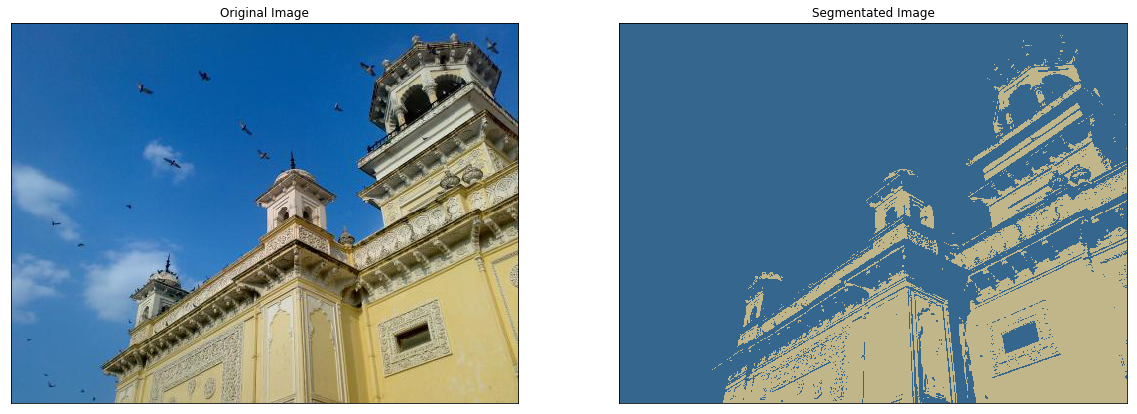

In [321]:
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)
dataset = img.reshape(img.shape[0]*img.shape[1], 3)

k = 2
firstHalf = int(dataset.shape[0]/k) - 1
# initialize the label & alpha
label = []
for i in range (0, firstHalf, 1):
    label.append(0)
for j in range (firstHalf, dataset.shape[0], 1):
    label.append(1)

# initialize the mean and number of pixels for each cluster
points = []
means = []
for n in range (0, k, 1):
    point = 0
    mean_r = 0
    mean_g = 0
    mean_b = 0
    for x in range (0, dataset.shape[0], 1):
        if label[x] == n:
            point = point + 1
            mean_r = mean_r + dataset[x][0]
            mean_g = mean_g + dataset[x][1]
            mean_b = mean_b + dataset[x][2]
    mean_r = mean_r / point
    mean_g = mean_g / point
    mean_b = mean_b / point
    points.append(point)
    means.append([mean_r, mean_g, mean_b])
    
# initialize the covariance
covariances = []
for m in range (0, k, 1):
    covariance_r = 0
    covariance_g = 0
    covariance_b = 0
    for y in range (0, dataset.shape[0], 1):
        if label[y] == m:
            covariance_r = covariance_r + np.power((dataset[y][0] - means[m][0]), 2)
            covariance_g = covariance_g + np.power((dataset[y][1] - means[m][1]), 2)
            covariance_b = covariance_b + np.power((dataset[y][2] - means[m][2]), 2)
    covariances.append([covariance_r/(points[m]-1), covariance_g/(points[m]-1), covariance_b/(points[m]-1)])
    
alphas = []
for a in range (0, k, 1):
    prob = 0
    for b in range (0, dataset.shape[0], 1):
        if label[b] == a:
            prob = prob + normal_Distribution(dataset[b], means[a], covariances[a])
    alphas.append(prob / points[a])


theta = []
for c in range (0, k, 1):
    theta.append(points[c])
for d in range (0, k, 1):
    theta.append(alphas[d])
for e in range (0, k, 1):
    theta.append(means[e])
for f in range (0, k, 1):
    theta.append(covariances[f])


print(theta)
# K_means iteration(10)
for n in range(10):
    theta, label = EM_algorithm (dataset, k, theta, label) 

centers = []
for g in range (0, k, 1):
    centers.append(theta[2*k+g])
    
centers = np.uint8(centers)
segmentation = centers[label]
segmentation = segmentation.reshape((img.shape))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(segmentation)
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

## EM K = 3

[65536, 65536, 65536, 0.005601643503278084, 0.002977657711579948, 0.0033255266836122585, [33.91331481933594, 94.10685729980469, 147.1336669921875], [91.37059020996094, 124.70164489746094, 147.33444213867188], [149.5340118408203, 152.81385803222656, 129.24966430664062], [1792.0238123386375, 699.65732323756, 1613.4897547440062], [3575.7348359811062, 1434.7851264616652, 3003.9724070671814], [3262.427163923132, 1584.2117075502867, 1983.9727015009794]]
[100818, 65536, 65536, 0.7109613100829323, 0.002977657711579948, 0.0033255266836122585, [29.899243446110432, 100.06274004270969, 164.5068663775115], [91.37059020996094, 124.70164489746094, 147.33444213867188], [149.5340118408203, 152.81385803222656, 129.24966430664062], [456.48860849258966, 300.00090580590864, 932.6962960194802], [3575.7348359811062, 1434.7851264616652, 3003.9724070671814], [3262.427163923132, 1584.2117075502867, 1983.9727015009794]]
[100818, 25216, 65536, 0.7109613100829323, 0.4564024367676023, 0.0033255266836122585, [29.899

[94551, 34572, 67424, 0.9796355477085955, 0.9535697596339276, 0.9635451621985294, [31.60133472516999, 103.97698414333958, 170.80744029366278], [83.78381124627093, 78.10566564597316, 54.89109937335426], [179.77312553118864, 175.2439627336103, 143.7636019117732], [451.940763572656, 190.97605001893777, 115.39822107865648], [1260.5660903677513, 971.3734282444767, 831.2282777413278], [1020.1127525301866, 429.63633159394004, 1068.9118428433806]]
[94551, 34225, 67424, 0.9796355477085955, 0.9533463132019284, 0.9635451621985294, [31.60133472516999, 103.97698414333958, 170.80744029366278], [83.28885942843051, 77.62971564229137, 54.49106117670785], [179.77312553118864, 175.2439627336103, 143.7636019117732], [451.940763572656, 190.97605001893777, 115.39822107865648], [1245.7366857025615, 958.0918422153729, 820.0765067099732], [1020.1127525301866, 429.63633159394004, 1068.9118428433806]]
[94551, 34225, 67832, 0.9796355477085955, 0.9533463132019284, 0.9649151769664291, [31.60133472516999, 103.976984

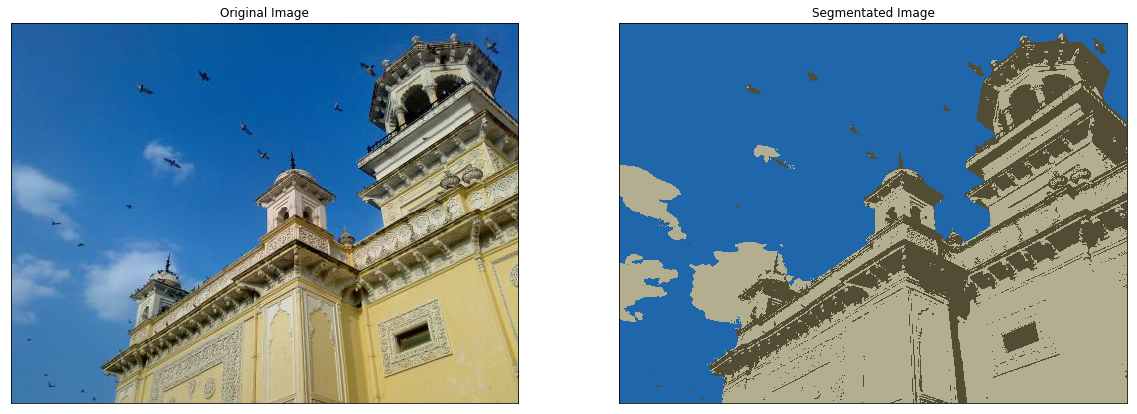

In [318]:
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)
dataset = img.reshape(img.shape[0]*img.shape[1], 3)

k = 3
first = int(dataset.shape[0]/k)
second = first * 2
# initialize the label 
label = []
for i in range (0, first, 1):
    label.append(0)
for j in range (first, second, 1):
    label.append(1)
for m in range (second, dataset.shape[0], 1):
    label.append(2)
    
# initialize the mean and number of pixels for each cluster
points = []
means = []
for n in range (0, k, 1):
    point = 0
    mean_r = 0
    mean_g = 0
    mean_b = 0
    for x in range (0, dataset.shape[0], 1):
        if label[x] == n:
            point = point + 1
            mean_r = mean_r + dataset[x][0]
            mean_g = mean_g + dataset[x][1]
            mean_b = mean_b + dataset[x][2]
    mean_r = mean_r / point
    mean_g = mean_g / point
    mean_b = mean_b / point
    points.append(point)
    means.append([mean_r, mean_g, mean_b])
    
# initialize the covariance
covariances = []
for m in range (0, k, 1):
    covariance_r = 0
    covariance_g = 0
    covariance_b = 0
    for y in range (0, dataset.shape[0], 1):
        if label[y] == m:
            covariance_r = covariance_r + np.power((dataset[y][0] - means[m][0]), 2)
            covariance_g = covariance_g + np.power((dataset[y][1] - means[m][1]), 2)
            covariance_b = covariance_b + np.power((dataset[y][2] - means[m][2]), 2)
    covariances.append([covariance_r/(points[m]-1), covariance_g/(points[m]-1), covariance_b/(points[m]-1)])
    
alphas = []
for a in range (0, k, 1):
    prob = 0
    for b in range (0, dataset.shape[0], 1):       
        if label[b] == a:
            prob = prob + normal_Distribution(dataset[b], means[a], covariances[a])
    alphas.append(prob / points[a])


theta = []
for c in range (0, k, 1):
    theta.append(points[c])
for d in range (0, k, 1):
    theta.append(alphas[d])
for e in range (0, k, 1):
    theta.append(means[e])
for f in range (0, k, 1):
    theta.append(covariances[f])


print(theta)
# K_means iteration(10)
for n in range(10):
    theta, label = EM_algorithm (dataset, k, theta, label) 

centers = []
for g in range (0, k, 1):
    centers.append(theta[2*k+g])
    
centers = np.uint8(centers)
segmentation = centers[label]
segmentation = segmentation.reshape((img.shape))

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(segmentation)
plt.title("Segmentated Image"), plt.xticks([]), plt.yticks([])
plt.show()

### Reasoning Question

EM and Kmeans will give same solution when the distribution of data is similar in all the clusters. If this is not the case, then the normal distribution of one(or more) clusters would be skewed and there will be more "gray area" between the clusters so the EM method can group a lot more points in one of the clusters when standard deviation is taken into account. 
